In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np 
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure',figsize=(10,6))
from pandas import DataFrame,Series
np.set_printoptions(precision=4)
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\Administrator\\Documents'

## 创建图层

In [3]:
fig=plt.figure() #空图层,，不能绘图，需add_subplot()

- 绘图.add_subplot()

In [4]:
ax1=fig.add_subplot(2,2,1) # 图像是2*2 的，且当前选中4个subplot中的第一个（编号从1开始）

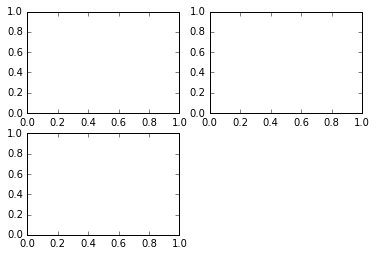

In [5]:
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
fig

- 绘图命令

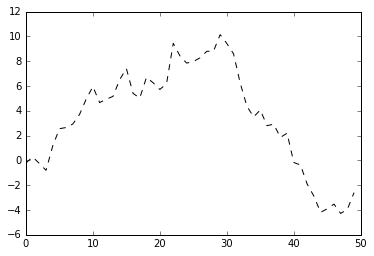

In [6]:
plt.plot(randn(50).cumsum(),'k--')#k-- 表示绘制黑色虚线 

In [7]:
ax1.hist(randn(100), bins=20, color='k', alpha=0.3)#alpha 透明度
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))


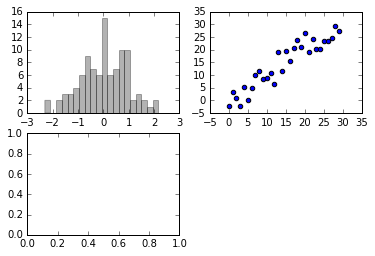

In [8]:
fig

In [9]:
plt.close('all') #关闭图表

- plt.subplots 创建新的Figure 并返回一个含有已创建的subplot对象的Numpy数组

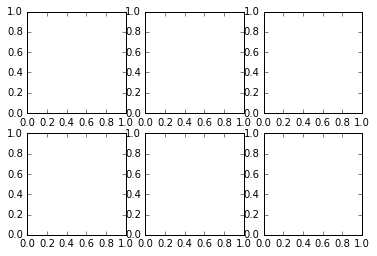

In [10]:
fig,axes=plt.subplots(2,3)

In [12]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009372F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000950B710>]], dtype=object)

In [ ]:
'''subplots的选项--sharex:用相同的x轴刻度，
    调整间距 subplots_adjust() '''

In [ ]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

### 示例

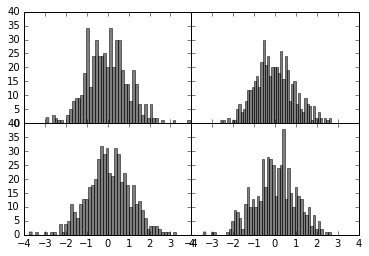

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色、标记、线型

- 格式 ax.plot(x,y,'颜色标记线型'，label='图例')

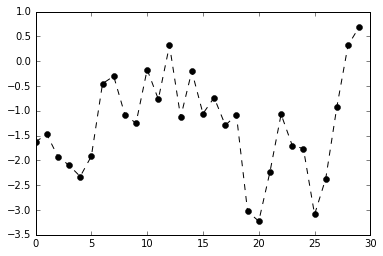

In [14]:
plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')

In [15]:
plt.close('all')

In [16]:
data=randn(30).cumsum()

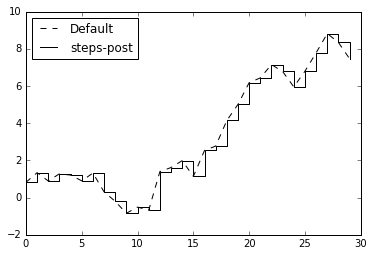

In [17]:
plt.plot(data,'k--',label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 刻度，标签，图例

- 图例 label

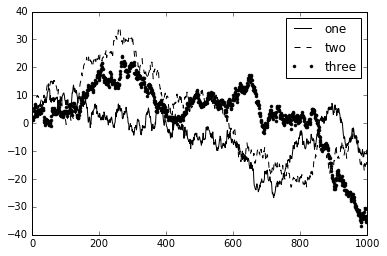

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best') #放到最佳位置

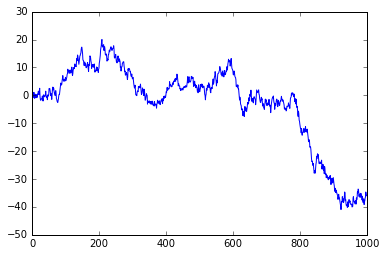

In [19]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

- 修改x的刻度 标题 set_xticks

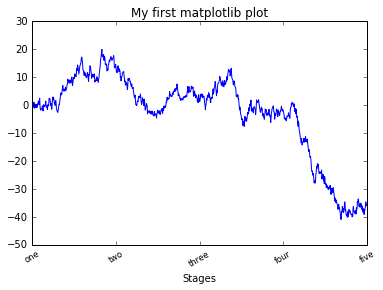

In [20]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # 刻度放在数据范围
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],\
                            rotation=30, fontsize='small')#刻度标签
ax.set_title('My first matplotlib plot') #设置标题
ax.set_xlabel('Stages')#为X轴设置名称
fig

- 注解 text arrow annotate 等函数添加 

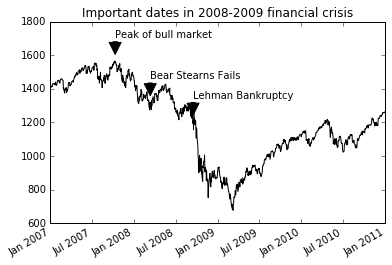

In [37]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('c/ch08/spx.csv', index_col=0, parse_dates=True)
#第一列是索引，而且是日期格式

spx = data['SPX']

spx.plot(ax=ax, style='k-')#Series 画图

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),#.asof() 返回date最后一个值 
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

- 保存图像

In [42]:
fig.savefig('figpath.png',dpi=400,bbox_inchers='tight')
#得到一张最小白边 且分辨率为400dpi图像

## Pandas 绘图函数

** 线形图 (series,dataframe 绘图 plot 默认值)**

In [43]:
plt.close('all')

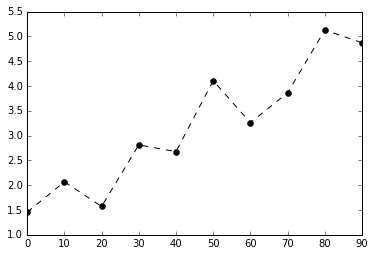

In [54]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(style='ko--') #索引自动转为X轴 

In [51]:
data=np.random.randn(10, 4)
print(data)

[[-1.2241 -1.8008  1.6347  0.989 ]
 [ 0.4579  0.5552  1.3067 -0.4406]
 [-0.3014  0.4988 -0.824   1.3206]
 [ 0.508  -0.6534  0.187  -0.3917]
 [-0.2723 -0.0171  0.6803  0.6355]
 [-0.7572  0.7181 -0.3043 -1.6778]
 [ 0.427  -1.5637 -0.3675  1.0459]
 [ 1.22   -0.2477 -0.4162 -0.1167]
 [-1.8448  2.0687 -0.777   1.4402]
 [-0.1106  1.2274  1.9208  0.7464]]


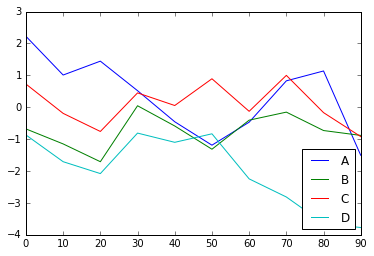

In [53]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

** 柱状图 .plot(kind='bar'，stacked=True)**

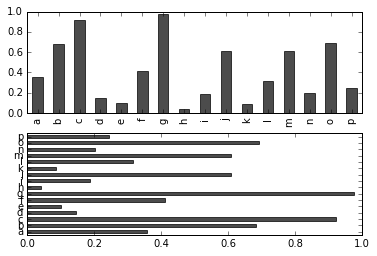

In [57]:
fig,axes=plt.subplots(2,1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh',ax=axes[1], color='k', alpha=0.7)#alpha 透明度

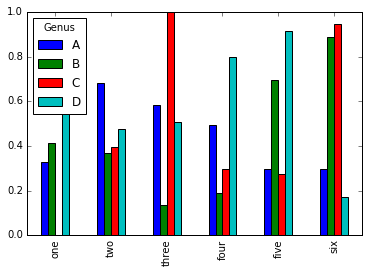

In [56]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot(kind='bar')
#行转化为横坐标

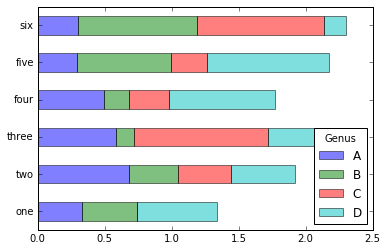

In [58]:
df.plot(kind='barh', stacked=True, alpha=0.5) #

- 进行规格化

In [40]:
import pandas as pd 
tips = pd.read_csv('c/ch08/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'],rownames=['day'], colnames=['size'])#tips.day分类计数 
party_counts 

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [43]:
#1个,6个聚会比较少 去除杂项
party_counts = party_counts.ix[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


规格化和为1

In [47]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


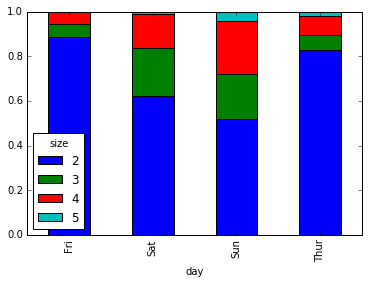

In [48]:
party_pcts.plot(kind='bar', stacked=True)

### 直方图(hist)和密度图(plot kind='kde')

In [50]:
plt.close('all')

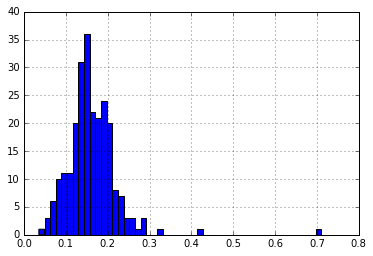

In [60]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

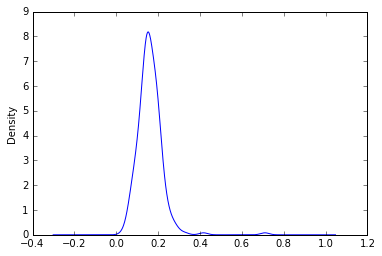

In [52]:
tips['tip_pct'].plot(kind='kde')

- 直方图以规格化形式输出，密度图估计

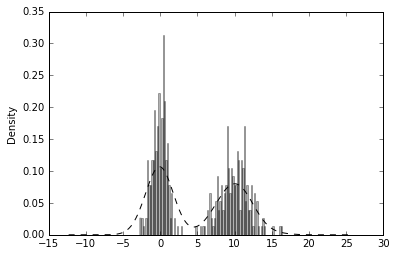

In [57]:
plt.close('all')
comp1 = np.random.normal(0, 1, size=200) # N(0, 1) 均值0 方差1 的正态分布
comp2 = np.random.normal(10, 2, size=200) 
values = Series(np.concatenate([comp1, comp2]))#拼接两个array 并且转为Series 可绘图
values.hist(bins=100, alpha=0.3, color='k',normed=True)
values.plot(kind='kde', style='k--')

### 散点图

In [3]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
macro = pd.read_csv('c/ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


- .diff() 前后项的差值

In [4]:
x = np.array([1, 2, 4, 7, 0])
np.diff(x)

array([ 1,  2,  3, -7])

In [5]:
np.diff(x, n=2)

array([  1,   1, -10])

In [6]:
x = np.array([[1, 3, 6, 10], [0, 5, 6, 8]])
np.diff(x)

array([[2, 3, 4],
       [5, 1, 2]])

In [7]:
np.diff(x, axis=0)

array([[-1,  2,  0, -2]])

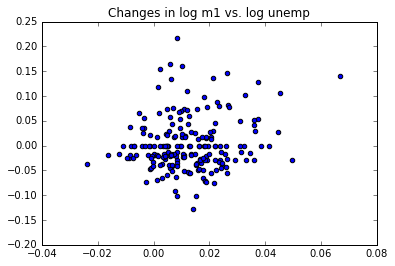

In [8]:
plt.figure()
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

- 散布图矩阵 pd.scatter_matrix(data,diagonal='kde'……）

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000092F6F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ABAEBE0>]], dtype=object)

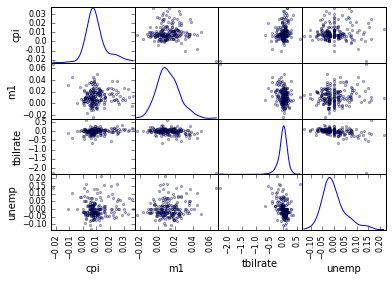

In [9]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

### 绘制地图

In [10]:
data = pd.read_csv('c/ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [11]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]#时间戳，经度，维度

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [12]:
data['CATEGORY'][:6] #逗号分隔的数据

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [13]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


- 清楚错误地理位置并移除缺失分类信息

In [14]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &\
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)\
            & data.CATEGORY.notnull()]

- 获取分类列表和分类信息拆分为编码和英语部分

In [20]:
a=data['CATEGORY'][:6]
b=(x.strip() for x in a.split(','))

AttributeError: 'Series' object has no attribute 'split'

In [28]:
def to_cat_list(catstr):
    stripped=(x.strip() for x in catstr.split(','))
    return [x for x in stripped if x ]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

- 编码和名字映射的字典，后期用编码进行分析

In [29]:
all_cats = get_all_categories(data.CATEGORY)
all_cats[:5]

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire']

In [31]:
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

- 分类选取记录的方式之一：添加指标，每个分类为一列 
- 首先抽取唯一的分类编码（列为分类编码，索引为data索引）

In [32]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [33]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [34]:
code_index[:2]

Index(['1', '1a'], dtype='object')

In [35]:
dummy_frame.ix[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


- 将各行适当的项设置为1，再与data进行连接

In [36]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

In [37]:
data = data.join(dummy_frame.add_prefix('category_'))